<a href="https://colab.research.google.com/github/BudiAtu/BudiAtu.github.io/blob/main/sentimen2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords



from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import  Activation, Dropout, Dense
from keras.layers import  Flatten
from keras.layers import GlobalMaxPooling1D

from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [203]:
#input data
data = pd.read_excel('sentiment.xlsx')
data.isnull().values.any()
data.shape


(1005, 2)

In [204]:
#Menampilkan Data 5 baris
data.head()

,content,sentiment
0,Saya baru kemaren instal aplikasi ini langsung...,Negatif
1,Baru diupdate mlah ngelag terus pdahal jaringa...,Negatif
2,Kecewa dengan aplikasinya. Disaat saya ingin b...,Negatif
3,Kiye apik yakin,Positif
4,"Bapak saya mau pesen 3 penumpang, saat pemilih...",Negatif


In [205]:
#contoh menampilkan data attribut dari record 3
data["content"][3]

'Kiye apik yakin'

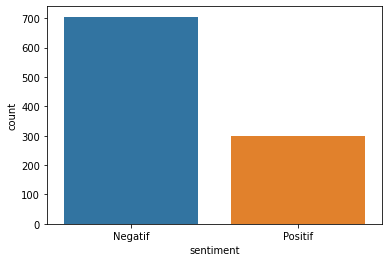

In [206]:
#Seaborn merupakan pustaka visualisasi data 
import seaborn as sns
sns.countplot(x='sentiment', data=data)

In [208]:
#preprosesing data
def preprocess_text(sen):
  #Removing html tags
  sentence = remove_tags(sen)

  #removing punctuation and numbers
  sentence = re.sub('[^a-zA-Z]', ' ', sentence)

  #single character removal
  sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)



  #Removing mutiple spaces
  sentence = re.sub(r'\s+', ' ', sentence)

  return sentence

In [209]:
#eretan karakter yang digunakan untuk pencarian string atau teks dengan menggunakan pola (pattern)
import re
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
  return TAG_RE.sub('', text)

In [210]:
#membuat array list
X = []
sentences = list(data['content'])
for sen in sentences:
  X.append(preprocess_text(sen))

In [211]:
X[0]

'Saya baru kemaren instal aplikasi ini langsung Bisa dibuka Tapi hari ini buka lagi ko ga bisa Cuma muncul layar putih Ditunggu lama banget sampe saya uinstall lalu instal lagi tetep aja kek gini Tolong diperbaiki dong Ga malah memudahkan malah ribet jadinya Kita komplain juga ga malah dibales atau dikasih solusi Mana admin nya ini '

In [212]:
#membuat array dari sentimen data
y = data['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positif" else 0, y)))

In [213]:
#split data untuk membagi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [214]:
#memisahkan teks menjadi potongan-potongan berupa token, bisa berupa potongan huruf, kata, atau kalimat
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [215]:
#adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [216]:
from numpy import array
from numpy import  asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file =open('/content/drive/MyDrive/glove.6B.100d.txt', encoding="utf8")
for line in glove_file:
  records =line.split()
  word = records[0]
  vector_dimensions = asarray(records[1:], dtype='float32')
  embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [217]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
  embedding_vector = embeddings_dictionary.get(word)
  if embedding_vector is not None:
    embedding_matrix[index] = embedding_vector

In [218]:
#Dekrasi untuk Model CNN
from keras.models import Model
from keras.layers import Conv1D, Dense, MaxPool1D, Flatten, Input



import numpy as np
model = Sequential()

In [219]:
#membangun model CNN
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [220]:
#Menampilkan hasil pembuatan MOdel
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          231400    
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 295,657
Trainable params: 64,257
Non-trainable params: 231,400
_________________________________________________________________


In [221]:
#melakukan Training
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=128, epochs=10, verbose=1, validation_split=0.1)






Epoch 1/10
6/6 [==============================] - 1s 117ms/step - loss: 0.3977 - acc: 0.8423 - val_loss: 0.0799 - val_acc: 1.0000
Epoch 2/10
6/6 [==============================] - 1s 87ms/step - loss: 0.0751 - acc: 1.0000 - val_loss: 0.0237 - val_acc: 1.0000
Epoch 3/10
6/6 [==============================] - 1s 89ms/step - loss: 0.0401 - acc: 1.0000 - val_loss: 0.0127 - val_acc: 1.0000
Epoch 4/10
6/6 [==============================] - 1s 88ms/step - loss: 0.0299 - acc: 1.0000 - val_loss: 0.0087 - val_acc: 1.0000
Epoch 5/10
6/6 [==============================] - 1s 89ms/step - loss: 0.0253 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 1.0000
Epoch 6/10
6/6 [==============================] - 1s 90ms/step - loss: 0.0229 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 1.0000
Epoch 7/10
6/6 [==============================] - 1s 88ms/step - loss: 0.0212 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 1.0000
Epoch 8/10
6/6 [==============================] - 1s 98ms/step - loss: 0.0200 - acc: 1.0000 - va

In [222]:
#testing model
loss, accuracy = model.evaluate(X_train, y_train)
print('Test Accuracy: %f' % (acc*100))

26/26 [==============================] - 0s 12ms/step - loss: 0.0165 - acc: 1.0000
Test Accuracy: 100.000000


In [223]:
# evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy: %f' % (acc*100))

7/7 [==============================] - 0s 11ms/step - loss: 0.0198 - acc: 1.0000
Test Accuracy: 100.000000


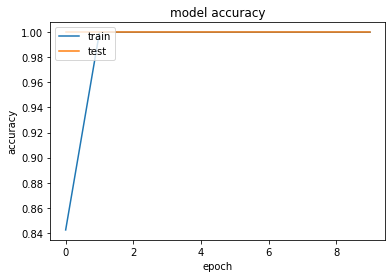

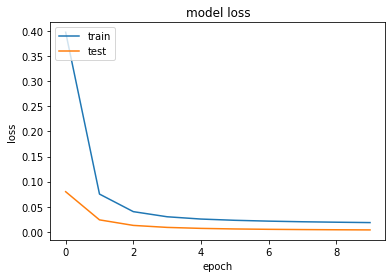

In [224]:
#visualisasi data hasil 

import matplotlib.pyplot as plt
plt.plot(history.history['acc'])

plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




In [ ]:
y_pred=model.predict(X_test)
y_pred

In [ ]:
y_pred=model.predict(X_train)
y_pred

In [166]:
# evaluate model with test set
model_evaluate()

NameError: ignored